In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../application_data/cleaned_data_before_transform.csv')
df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,WEEKDAY_APPR_PROCESS_START
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Laborers,0.018801,2,2,0,0,0,0,1,WEDNESDAY
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Core staff,0.003541,1,1,0,0,0,0,0,MONDAY
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Laborers,0.010032,2,2,0,0,0,0,0,MONDAY
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Laborers,0.008019,2,2,0,0,0,0,0,WEDNESDAY
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Core staff,0.028663,2,2,0,1,0,0,0,THURSDAY


In [12]:
df_processed = pd.read_csv('../application_data/cleaned_data_scaled.csv')
df_processed.head()

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_CONTRACT_TYPE_Cash loans,...,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.242861,0.252132,-0.149452,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,3.374485
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.174085,-0.168527,-1.252750,-2.067573,-2.051813,-0.291208,-0.547236,-0.124004,-0.231267,-0.296342
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.591031,-0.589187,-0.783451,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,-0.296342
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.242861,0.252132,-0.928991,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,-0.296342
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,-0.591031,-0.589187,0.563570,-0.103064,-0.062699,-0.291208,1.827367,-0.124004,-0.231267,-0.296342


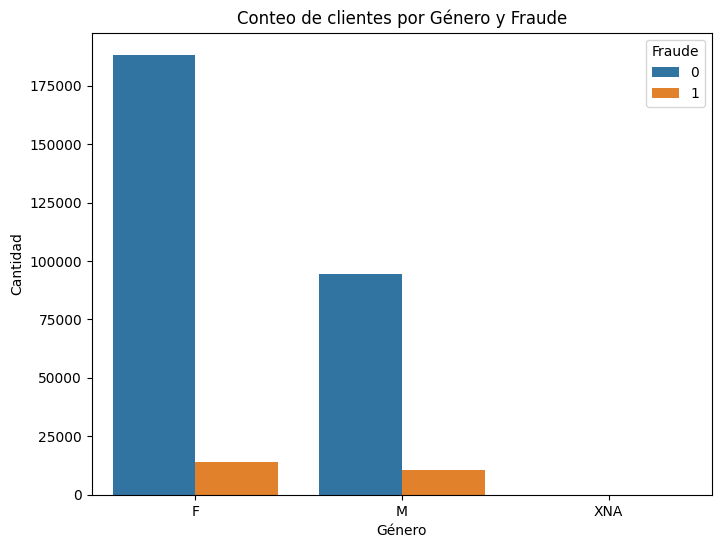

In [3]:
df_gender = df.groupby(["CODE_GENDER", "TARGET"])["TARGET"].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_gender,
    x="CODE_GENDER",
    y="count",
    hue="TARGET"   
)
plt.title("Conteo de clientes por Género y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Género")
plt.legend(title='Fraude', loc='upper right')
plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_29420\4278961448.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")


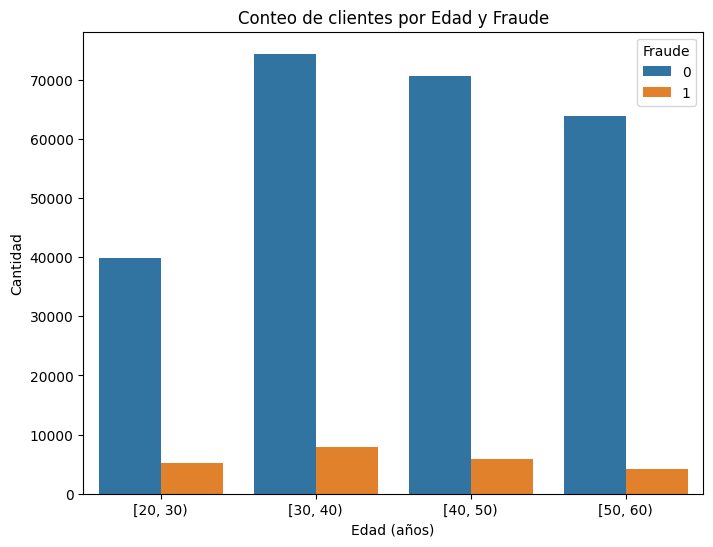

In [4]:
df_age = df[['DAYS_BIRTH','TARGET']].copy()
df_age['YEARS_BIRTH'] = (df_age['DAYS_BIRTH'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH')
df_age['AGE_BIN'] = pd.cut(df_age['YEARS_BIRTH'], bins=range(df_age['YEARS_BIRTH'].min(), df_age['YEARS_BIRTH'].max(), 10), right=False)
df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
#df_age_count = df_age.groupby(['YEARS_BIRTH','TARGET'])['TARGET'].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_age_count,
    x="AGE_BIN",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Edad y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Edad (años)")
plt.legend(title='Fraude', loc='upper right')
plt.show()

In [9]:
df['DAYS_EMPLOYED'].unique().max()

365243

<Axes: xlabel='DAYS_EMPLOYED'>

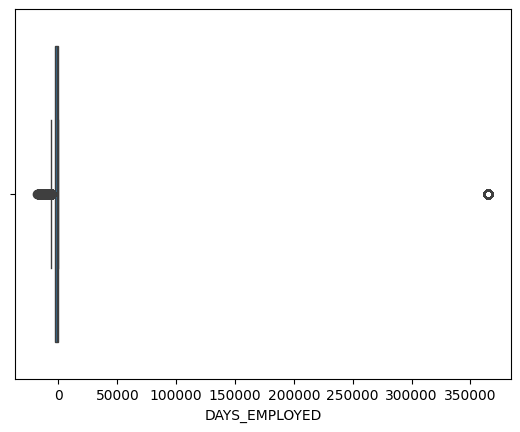

In [10]:
sns.boxplot(data=df, x='DAYS_EMPLOYED')


In [6]:
df_age = df[['DAYS_EMPLOYED','TARGET']].copy()
df_age['YEARS_BIRTH'] = (df_age['DAYS_EMPLOYED'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH')
df_age['AGE_BIN'] = pd.cut(df_age['YEARS_BIRTH'], bins=range(df_age['YEARS_BIRTH'].min(), df_age['YEARS_BIRTH'].max(), 10), right=False)
df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
#df_age_count = df_age.groupby(['YEARS_BIRTH','TARGET'])['TARGET'].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_age_count,
    x="AGE_BIN",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Edad y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Edad (años)")
plt.legend(title='Fraude', loc='upper right')
plt.show()

KeyError: "['DAYS_BIRTH'] not found in axis"

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

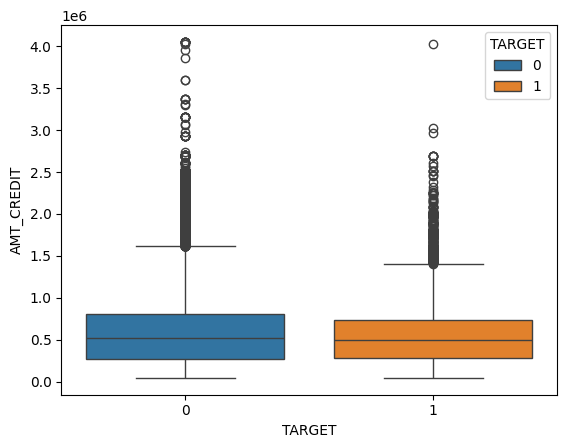

In [ ]:
sns.boxplot(data=df, x = 'TARGET',y='AMT_CREDIT',hue='TARGET')

In [ ]:
sorted(df['AMT_INCOME_TOTAL'].unique(),reverse=True)[:5]

[117000000.0, 18000090.0, 13500000.0, 9000000.0, 6750000.0]

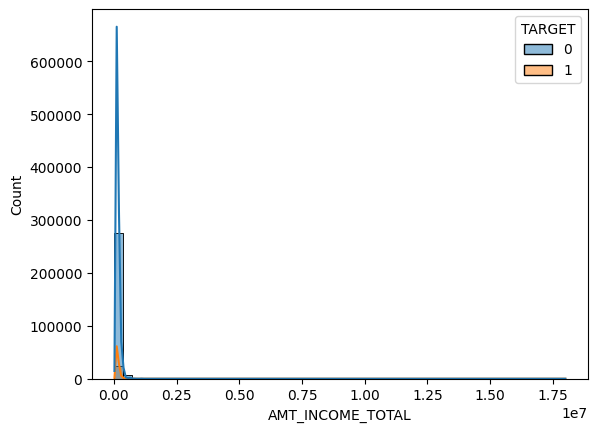

In [ ]:
df_filtered = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].max()]
sns.histplot(data=df_filtered, x='AMT_INCOME_TOTAL', bins = 50,kde=True,hue='TARGET')
plt.show()

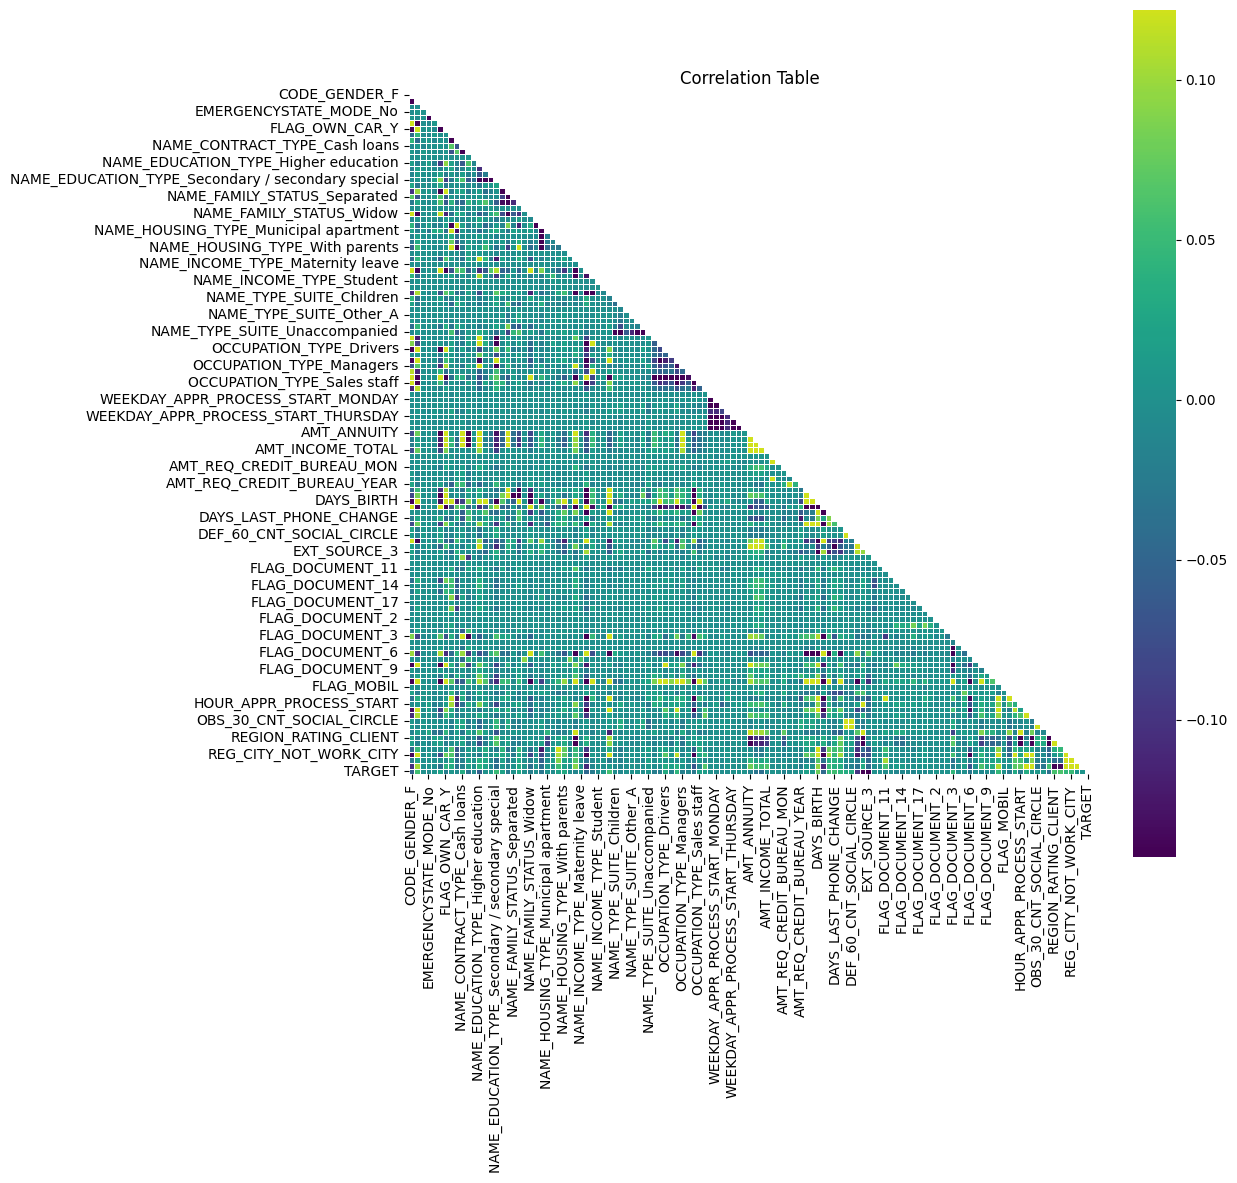

In [13]:
plt.figure(figsize = (11,11))
corr = df_processed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

In [18]:
df_processed.corr()['TARGET'][:-1].abs().sort_values().tail(20)

OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
DAYS_EMPLOYED                                        0.044932
FLAG_EMP_PHONE                                       0.045982
NAME_INCOME_TYPE_Pensioner                           0.046209
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_F                                        0.054704
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_EDUCATION_TYPE_Higher education                 0.056593
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIR

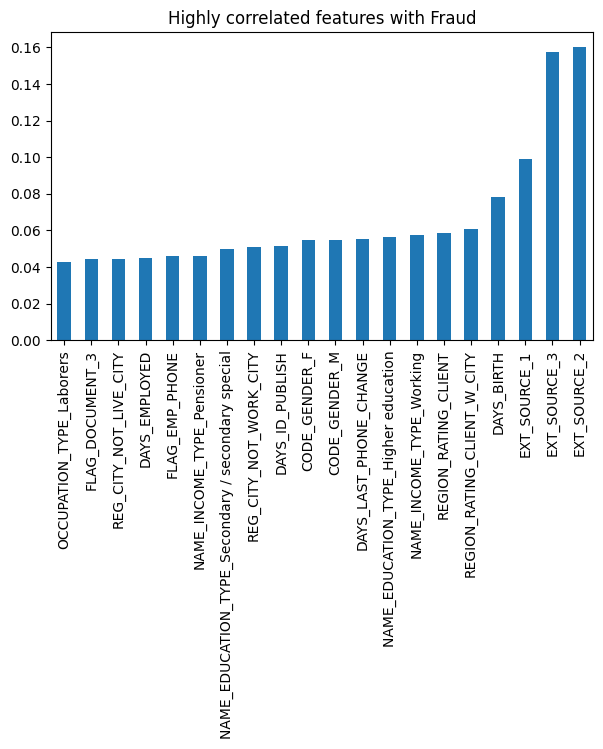

In [19]:
plt.figure(figsize=(7,4))
d = df_processed.corr()['TARGET'][:-1].abs().sort_values().tail(20).plot(kind='bar', title='Highly correlated features with Fraud')